C:\Users\18\AppData\Local\Temp\ipykernel_18888\1951152839.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeGroup')['Survived'].agg(['sum', 'count'])


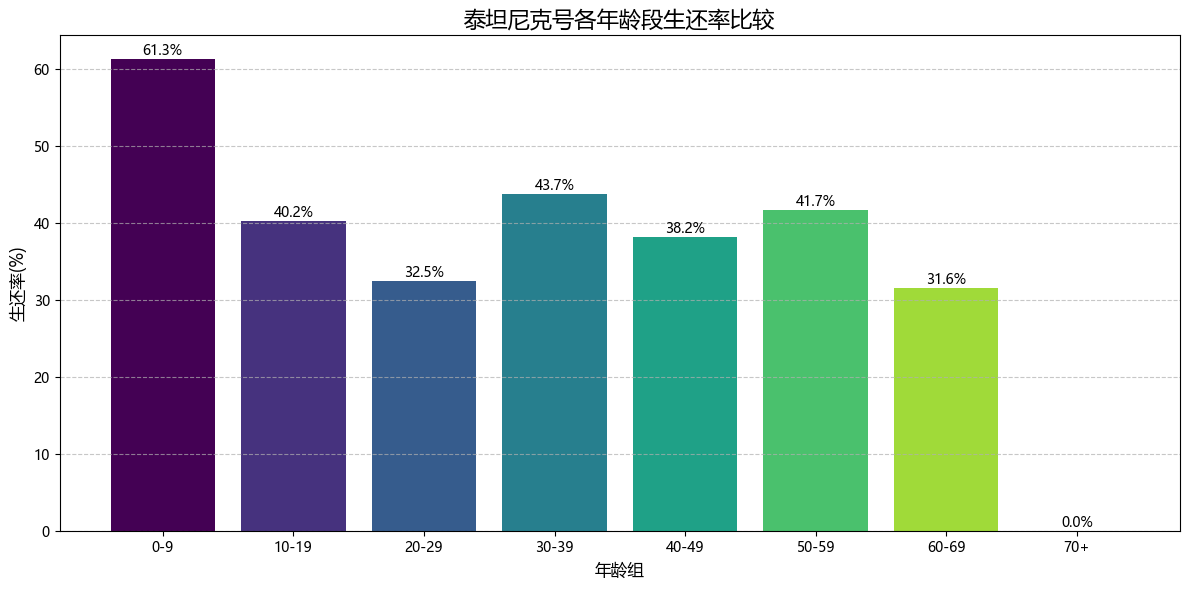


各年龄段生还情况统计:
          sum  count  survival_rate
AgeGroup                           
0-9        38     62      61.290323
10-19      41    102      40.196078
20-29     129    397      32.493703
30-39      73    167      43.712575
40-49      34     89      38.202247
50-59      20     48      41.666667
60-69       6     19      31.578947
70+         0      6       0.000000


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
df = pd.read_csv('train.csv')

# 处理缺失的年龄数据（简单用中位数填充）
df['Age'] = df['Age'].fillna(df['Age'].median())

# 将年龄分组（每10岁一组）
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 计算各年龄组的生还率
age_survival = df.groupby('AgeGroup')['Survived'].agg(['sum', 'count'])
age_survival['survival_rate'] = age_survival['sum'] / age_survival['count'] * 100

# 创建图表
plt.figure(figsize=(12, 6))

# 绘制生还率直方图
bars = plt.bar(age_survival.index, age_survival['survival_rate'],
               color=plt.cm.viridis(np.linspace(0, 1, len(age_survival))))

# 添加数据标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom')

# 添加标题和标签
plt.title('泰坦尼克号各年龄段生还率比较', fontsize=16)
plt.xlabel('年龄组', fontsize=12)
plt.ylabel('生还率(%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.tight_layout()
plt.show()

# 打印详细数据
print("\n各年龄段生还情况统计:")
print(age_survival)